In [1]:
from sys import path

path.append("../")

from gc import collect as garbage_collect

from src.utils.experiment_info import ExperimentInfo
from src.utils.io import load_processed_data

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def get_artifacts_data(eda_data_base_path: str) -> pd.DataFrame:
    eda_data = load_processed_data(path=eda_data_base_path, file_format="parquet")
    garbage_collect()
    artifact_data = {
        side: {user: eda_data[side][user]["Artifact"] for user in eda_data[side].keys()}
        for side in eda_data.keys()
    }
    del eda_data
    # count the number of artifacts, per user and per side, by doing the sum of the series
    # and then divide it by the length of the series
    artifact_count = {
        side: {
            user: artifact_data[side][user].sum() / len(artifact_data[side][user])
            for user in artifact_data[side].keys()
        }
        for side in artifact_data.keys()
    }
    artifact_count = pd.DataFrame.from_dict(artifact_count)
    artifact_count["sum"] = artifact_count["left"] + artifact_count["right"]
    # remove values who sum is 0
    artifact_count = artifact_count[artifact_count["sum"] > 0.01]
    artifact_count = artifact_count.drop(columns=["sum"], inplace=False)
    artifact_count = artifact_count.reset_index().melt(
        id_vars="index", var_name="side", value_name="artifact_count"
    )
    artifact_count = artifact_count.rename(columns={"index": "user"}, inplace=False)
    artifact_count = artifact_count.sort_values(by=["user"], inplace=False)
    return artifact_count


def artifacts_barplot(
    artifact_count: pd.DataFrame,
    path_to_save: str,
    small_fontsize: int = 14,
    medium_fontsize: int = 18,
    large_fontsize: int = 20,
    figsize: int = 4.4,
):
    golden_ratio = (1 + 5**0.5) / 2

    # Set golden ratio figure size
    sns.set(font_scale=1)
    # increase font size
    plt.rc("font", size=small_fontsize)  # controls default text sizes
    plt.rc("axes", titlesize=medium_fontsize)  # fontsize of the axes title
    plt.rc("axes", labelsize=large_fontsize)  # fontsize of the x and y labels
    plt.rc("xtick", labelsize=small_fontsize)  # fontsize of the tick labels
    plt.rc("ytick", labelsize=small_fontsize)  # fontsize of the tick labels
    plt.rc("legend", fontsize=medium_fontsize)  # legend fontsize
    plt.rc("figure", titlesize=large_fontsize)  # fontsize of the figure title
    plt.rcParams.update({"font.size": medium_fontsize})
    plt.rcParams["mathtext.fontset"] = "stix"
    plt.rcParams["font.family"] = "STIXGeneral"

    plt.figure(figsize=(figsize * golden_ratio, figsize))
    # Set seaborn style
    sns.set_style("darkgrid")

    # Plot the barplot
    _ = sns.barplot(data=artifact_count, x="user", y="artifact_count", hue="side")
    plt.legend()
    # plt.title("Percentage of artifacts per user")
    plt.xlabel("User")
    plt.ylabel("Percentage of artifacts")

    # Add vertical bars
    for i in range(len(artifact_count["user"].unique()) - 1):
        plt.axvline(i + 0.5, color="white", linewidth=0.5)
    plt.ylim(0,1)

    plt.legend(title="Side")
    plt.savefig(path_to_save, bbox_inches="tight")
    plt.show()


# USILaughs

Loading data:   0%|          | 0/67 [00:00<?, ?it/s]

/Users/leonardoalchieri/Desktop/GIT/LateralizationPhysiologicalWearables/plotting_notebooks/../src/utils/io.py:354: RuntimeWarning: The data loaded for side right and user s040 is empty
  warn(
/Users/leonardoalchieri/Desktop/GIT/LateralizationPhysiologicalWearables/plotting_notebooks/../src/utils/io.py:354: RuntimeWarning: The data loaded for side left and user s040 is empty
  warn(


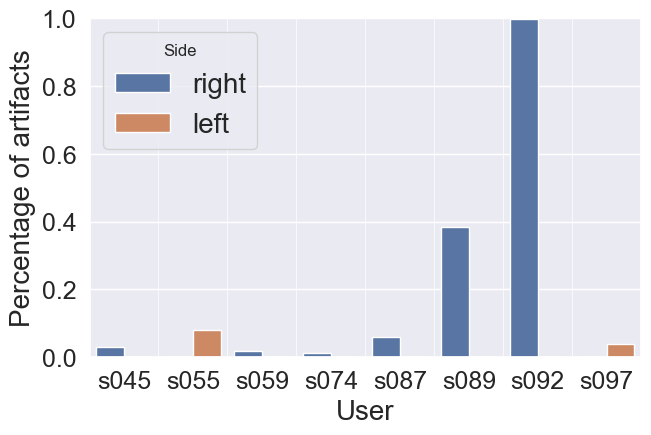

In [11]:
artifact_count = get_artifacts_data("../data.nosync/usilaughs/filtered/*/EDA/*.parquet")
artifacts_barplot(
    artifact_count=artifact_count,
    path_to_save="../final_visualizations/artifacts_usilaughs.pdf",
    small_fontsize = 18,
    medium_fontsize = 20,
    large_fontsize = 24,
    figsize = 4.4)

# MWC 2022

Loading data:   0%|          | 0/19 [00:00<?, ?it/s]

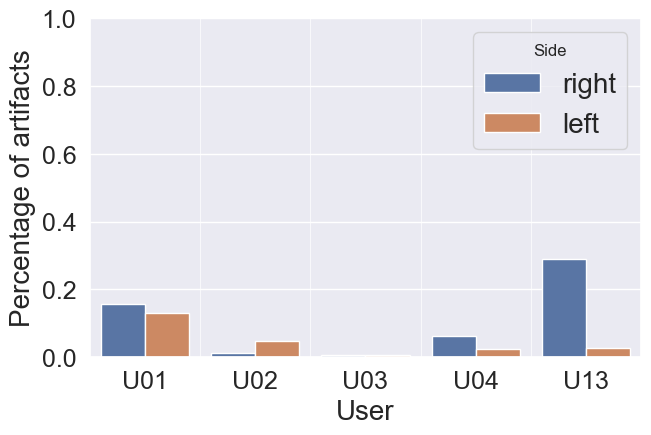

In [7]:
artifact_count = get_artifacts_data("../data.nosync/usilaughs/filtered/*/EDA/*.parquet")
artifacts_barplot(
    artifact_count=artifact_count,
    path_to_save="../final_visualizations/artifacts_mwc2022.pdf",
    small_fontsize = 18,
    medium_fontsize = 20,
    large_fontsize = 24,
    figsize = 4.4)